In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math
from implementations import *
from proj1_helpers import *
from misc_helpers import *
from plot_functions import *
from ml_math import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

## Do your crazy machine learning thing here :) ...

### Standardize

In [3]:
y_norm = normalize(y)
tX_norm = normalize(tX)

### Dimension lifting

In [5]:
def build_poly(tx,degree):
    D = len(tx[0,:])
    N = len(tx[:,0])
    new_x = np.ones((N,1)) #add bias
    if degree>=1:
        for i in range(1,degree+1):
            new_x = np.append(new_x,tx**i,axis=1) 
    return new_x

In [6]:
#Run this box only once!!
degree = 7
new_train = build_poly(tX_norm,degree)
print(np.shape(new_train))
tX = new_train #ECRASE LES DONNEES!!!

(250000, 211)


### Split Data

In [4]:
def split_data(y, x, ratio, myseed=1):
    """split the dataset based on the split ratio."""
    # set seed
    np.random.seed(myseed)
    # generate random indices
    num_row = len(y)
    indices = np.random.permutation(num_row)
    index_split = int(np.floor(ratio * num_row))
    index_tr = indices[: index_split]
    index_te = indices[index_split:]
    # create split
    x_tr = x[index_tr]
    x_te = x[index_te]
    y_tr = y[index_tr]
    y_te = y[index_te]
    return x_tr, x_te, y_tr, y_te

In [5]:
ratio = 0.75
x_train, x_test, y_train, y_test = split_data(y, tX, ratio)

### Gradient Descent

In [6]:
max_iter = 100
gamma = 1
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_GD, loss_GD = least_squares_GD(y_train, x_train, initial_w, max_iter, gamma, verbose = False)

/Users/jordanmetz/Documents/EPFL/MA3/The_Little_Turings/ml_math.py:32: RuntimeWarning: overflow encountered in matmul
  MSE_loss = 1/(2*N)*e@e
/Users/jordanmetz/Documents/EPFL/MA3/The_Little_Turings/ml_math.py:74: RuntimeWarning: overflow encountered in matmul
  e = y - tx@w
/Users/jordanmetz/Documents/EPFL/MA3/The_Little_Turings/ml_math.py:74: RuntimeWarning: invalid value encountered in matmul
  e = y - tx@w
/Users/jordanmetz/Documents/EPFL/MA3/The_Little_Turings/ml_math.py:77: RuntimeWarning: invalid value encountered in matmul
  gradient = -1/N*np.transpose(tx)@e
/Users/jordanmetz/Documents/EPFL/MA3/The_Little_Turings/ml_math.py:30: RuntimeWarning: overflow encountered in matmul
  e = y - tx @ w
/Users/jordanmetz/Documents/EPFL/MA3/The_Little_Turings/ml_math.py:30: RuntimeWarning: invalid value encountered in matmul
  e = y - tx @ w


In [7]:
loss_GD

nan

### Gradient Descent with early stopping

In [8]:
loss_test = np.array([1e7,1e6,1e5])
losses = []
i = 2
N_w = len(x_train[1,:])
w_GD2 = np.zeros(N_w)
max_i = 10
while ((loss_test[i-2]>loss_test[i-1] or loss_test[i-1]>loss_test[i]) )and i<=max_i:
    max_iter = 50
    gamma = 1
    N_w = len(x_train[1,:])
    w_GD2, loss_GD =least_squares_GD(y_train,x_train,w_GD2,max_iters = max_iter,gamma = gamma,verbose = False)
    losses = np.append(losses,loss_GD)
    loss_test = np.append(loss_test,compute_MSE(y_test,x_test,w_GD2))
    i=i+1
    print('i=',i,' gamma=',gamma)

i= 3  gamma= 1
i= 4  gamma= 1


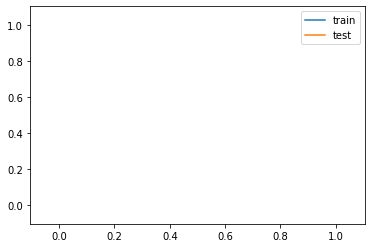

In [9]:
plt.plot(losses, label='train')
plt.plot(loss_test[3:], label='test')
plt.legend()

### Stochastic Gradient Descent

In [10]:
max_iter = 200
gamma = 1
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_sGD, loss_sGD = least_squares_SGD(y_train,x_train,initial_w,batch_size = 1, 
                                              max_iters = max_iter, gamma = gamma, verbose = False)

/Users/jordanmetz/Documents/EPFL/MA3/The_Little_Turings/ml_math.py:77: RuntimeWarning: overflow encountered in matmul
  gradient = -1/N*np.transpose(tx)@e


In [11]:
loss_sGD

nan

### Least squares

In [12]:
w_LS, loss_LS = least_squares(y_train,x_train)

In [13]:
loss_LS

0.33942675363884944

In [14]:
np.shape(x_train)

(187500, 30)

### Test Ridge Regression

In [16]:
# ridge regression:
lambda_ = 0.001
N = np.shape(x_train)[1]
w_RR = np.linalg.solve(x_train.transpose()@x_train+lambda_*np.identity(N), x_train.transpose()@y_train)
loss_RR = compute_MSE(y_train,x_train,w_RR)
print(loss_RR)

0.3394267748814092


### Test Logistic Regression

In [17]:
max_iter = 100
L = np.linalg.norm(x_train.T@x_train)
gamma = 1/L
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_LR_SGD, loss_LR_SGD = logistic_regression(y_train, x_train, initial_w, 
                                              max_iter, gamma, 
                                            verbose = False, use_SGD = True, batch_size = 1)
w_LR_GD, loss_LR_GD = logistic_regression(y_train, x_train, initial_w, 
                                              max_iter, gamma, 
                                          verbose = False, use_SGD = False, batch_size = 1)

### Test Regulated Logistic Regression

In [18]:
max_iter = 100
L = np.linalg.norm(x_train.T@x_train)
gamma = 1/L
lambda_ = 0.7
gamma = 2/(L+lambda_)
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_RLR_SGD, loss_LR_SGD = reg_logistic_regression(y_train, x_train, lambda_, initial_w, 
                                              max_iter, gamma,
                                                verbose = False, use_SGD = True)
w_RLR_GD, loss_LR_GD = reg_logistic_regression(y_train, x_train, lambda_, initial_w, 
                                              max_iter, gamma,
                                              verbose = False, use_SGD = False, batch_size = 1)

## Test ridge regression gradient descent

In [19]:
max_iter = 100
lambda_ = 0.7
N_w = len(x_train[1,:])
initial_w = np.zeros(N_w)
w_RR_GD, loss_RR_GD = ridge_regression_GD(y_train, x_train, initial_w, lambda_, max_iter, verbose=False)
print(w_RR_GD, loss_RR_GD)

[ 4.74323773e-04 -3.15750557e-04 -1.25959439e-04  5.90320227e-05
 -7.57037520e-05  3.64250007e-04 -8.35754181e-05 -1.69572756e-06
 -6.46243823e-05 -1.73346319e-04 -6.97246023e-06  5.14789359e-06
 -7.65827578e-05  9.31319186e-05 -9.45761853e-08 -2.18238007e-07
 -1.01283957e-04 -7.90762909e-08  1.78729515e-07 -3.32771364e-05
  3.07428971e-07 -2.59806864e-04 -3.33094424e-06  5.54672119e-06
  2.37689648e-05  2.37968656e-05 -1.49804492e-04 -7.70376526e-05
 -7.72381093e-05 -1.65194201e-04] 0.4680313525148537


### Test the best

In [20]:
print('LOSS TEST:')
print('GD: ', compute_MSE(y_test,x_test,w_GD))
print('GD2: ', compute_MSE(y_test,x_test,w_GD2))
print('sGD: ', compute_MSE(y_test,x_test,w_sGD))
print('LS: ', compute_MSE(y_test,x_test,w_LS))
print('RR: ', compute_MSE(y_test,x_test,w_RR))
print('LR_SGD: ', compute_MSE(y_test,x_test,w_LR_SGD))
print('LR_GD: ', compute_MSE(y_test,x_test,w_LR_GD))
print('RLR_SGD: ', compute_MSE(y_test,x_test,w_RLR_SGD))
print('RLR_GD: ', compute_MSE(y_test,x_test,w_RLR_GD))

LOSS TEST:
GD:  nan
GD2:  nan
sGD:  nan
LS:  0.3405182565064783
RR:  0.34051696330272196
LR_SGD:  591.3959557130228
LR_GD:  591.3959557130228
RLR_SGD:  2314.8867062209565
RLR_GD:  2314.8867062209565


### Choose the weight you want

In [ ]:
weights = w_GD

## Generate predictions and save ouput in csv format for submission:

In [ ]:
DATA_TEST_PATH = 'data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [ ]:
OUTPUT_PATH = 'result/to_try.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, build_poly(tX_test,degree))
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

In [ ]:
np.shape(build_poly(tX_test,degree))